In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [3]:
scaler = StandardScaler().fit(X)

X_std = scaler.transform(X)

In [4]:
X_train_std, X_test_std, y_train, y_test = train_test_split(
    X_std,
    y,
    test_size=0.3,
    random_state=1,
    stratify=y,
)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [5]:
svm = SVC(kernel="linear", C=1.0, random_state=1)

In [6]:
svm.fit(X_train_std, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [7]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ("o", "s", "^", "v", "<")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")

    cmap = ListedColormap(colors[: len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution),
    )

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[cl],
            marker=markers[cl],
            label=f"Class {cl}",
            edgecolor="black",
        )

    if test_idx:
        X_test, _ = X[test_idx, :], y[test_idx]

        plt.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c="none",
            edgecolor="black",
            alpha=1.0,
            linewidth=1,
            marker="o",
            s=100,
            label="Test set",
        )


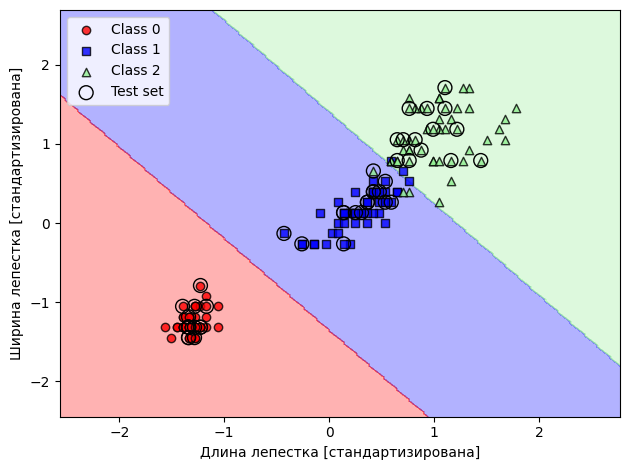

In [8]:
plot_decision_regions(
    X_combined_std,
    y_combined,
    svm,
    test_idx=range(105, 150),
)
plt.xlabel("Длина лепестка [стандартизирована]")
plt.ylabel("Ширина лепестка [стандартизирована]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

Replace LIBLINEAR (LIBSVM) by SGDClassifier


In [9]:
svm = SGDClassifier(loss="hinge")
ppn = SGDClassifier(loss="perceptron")
lr = SGDClassifier(loss="log")

Kernel SVM


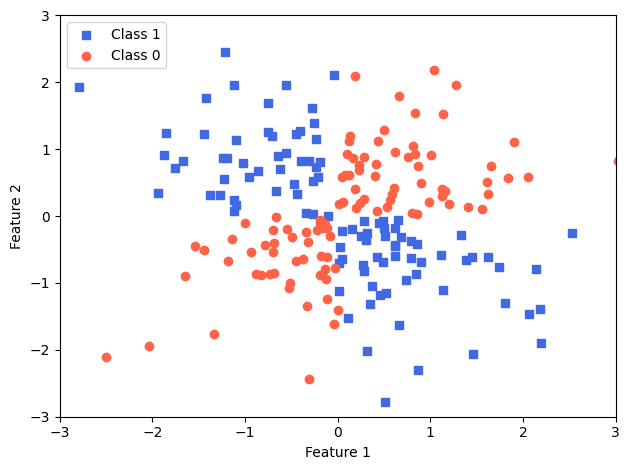

In [10]:
# Generate sintatic dataset
np.random.seed(1)

X_xor = np.random.randn(200, 2)

y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(
    X_xor[y_xor == 1, 0],
    X_xor[y_xor == 1, 1],
    c="royalblue",
    marker="s",
    label="Class 1",
)
plt.scatter(
    X_xor[y_xor == 0, 0],
    X_xor[y_xor == 0, 1],
    c="tomato",
    marker="o",
    label="Class 0",
)

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

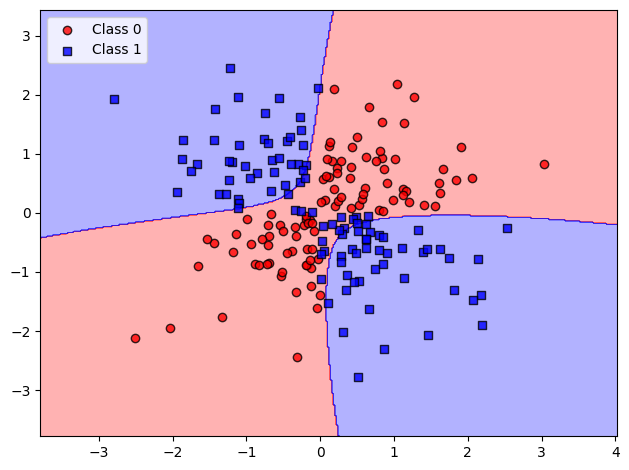

In [11]:
# Radial Basis Function for kernel SVM
svm = SVC(kernel="rbf", gamma=0.10, C=10.0, random_state=1)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, svm)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

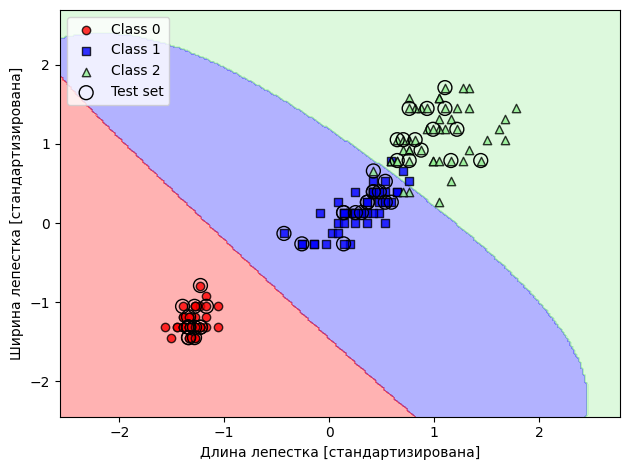

In [12]:
# Gamma hyperparameter (small value)

svm = SVC(kernel="rbf", random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(
    X_combined_std,
    y_combined,
    svm,
    test_idx=range(105, 150),
)
plt.xlabel("Длина лепестка [стандартизирована]")
plt.ylabel("Ширина лепестка [стандартизирована]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

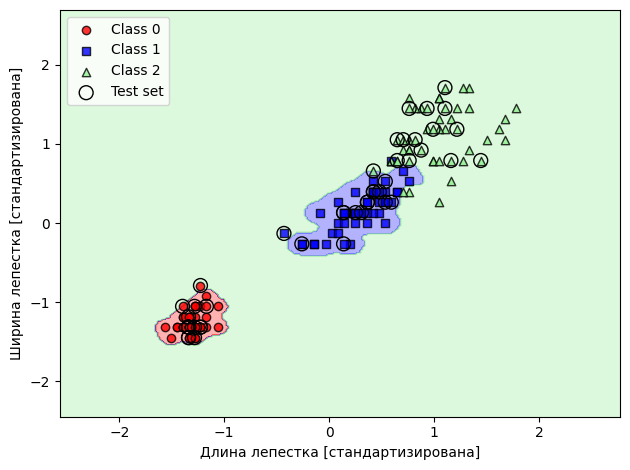

In [13]:
# Gamma hyperparameter (big value -> big variance, overfitting)

svm = SVC(kernel="rbf", random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(
    X_combined_std,
    y_combined,
    svm,
    test_idx=range(105, 150),
)
plt.xlabel("Длина лепестка [стандартизирована]")
plt.ylabel("Ширина лепестка [стандартизирована]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()